# Test Yolo v11

In [11]:
import requests
from matplotlib import pyplot as plt
import base64
import sys
import cv2
print(sys.executable)

d:\Programmation\Formation_Simplon\AGILE\Detection_en_temps_reel\API_detection\.venv\Scripts\python.exe


# Choisir une model pour telecharge
---

| Modèle  | Taille      | Vitesse            |
| ------- | ----------- | ------------------ |
| yolo11n | petite      | très rapide        |
| yolo11s | moyenne     | équilibrée         |
| yolo11m | grande      | plus précise       |
| yolo11l | très grande | plus lente         |
| yolo11x | très grande | précision maximale |


In [ ]:
# import model dans une dossier API_detection/cache
from model_loader import load_model

model = load_model("s") 


# Tester et verifier la model

```python
results = model("image.jpg")
r = results[0]
```

| Atribut        | Type           | Description                                              |
| -------------- | -------------- | -------------------------------------------------------- |
| `r.boxes.xyxy` | `tensor[N, 4]` | Coordonee: `[x1, y1, x2, y2]`                            |
| `r.boxes.conf` | `tensor[N]`    | Confidence                                               |
| `r.boxes.cls`  | `tensor[N]`    | Index (numeros 0–79 pour COCO)                           |
| `r.masks`      | optional       | Mask pour segmentation (si exist)                        |
| `r.plot()`     | method         | Image avec les boxes                                     |
| `model.names`  | dict           | Dict: index de classes → nom, par exemple `0: "person"`  |



image 1/1 d:\Programmation\Formation_Simplon\AGILE\Detection_en_temps_reel\API_detection\images_1.jpg: 448x640 1 dog, 217.2ms
Speed: 3.3ms preprocess, 217.2ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


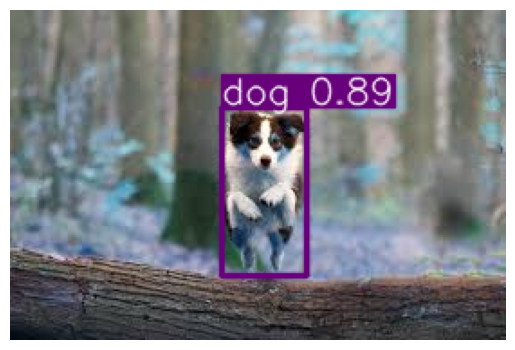

In [43]:
results = model("images_1.jpg")
img = results[0].plot()


plt.imshow(img)
plt.axis("off")
plt.show()

0: 448x640 1 dog, 191.3ms
Speed: 31.5ms preprocess, 191.3ms inference, 2.1ms postprocess per image at shape (1, 3, 448, 640)


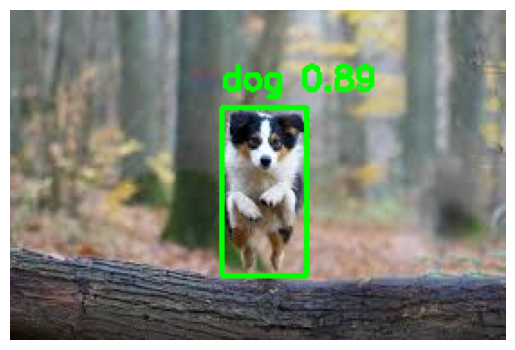

In [53]:
# dessiner manuel de boxes
img = cv2.imread("images_1.jpg")
r = model(img)[0]

for box in results.boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    conf = float(box.conf[0])
    cls = int(box.cls[0])
    label = model.names[cls]

    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(
        img,
        f"{label} {conf:.2f}",
        (x1, y1 - 10),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.6,
        (0, 255, 0),
        2,
    )

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [55]:
# gere les result

for box, conf, cls in zip(r.boxes.xyxy, r.boxes.conf, r.boxes.cls):
    x1, y1, x2, y2 = map(int, box)
    confidence = float(conf)
    class_id = int(cls)
    label = model.names[class_id]

    print(f"{label}: {confidence:.2f} at [{x1}, {y1}, {x2}, {y2}]")

dog: 0.89 at [117, 54, 164, 147]
